In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('D:\ZomatoX-ML\Data\enhanced_zomato_dataset_clean.csv')


<>:12: SyntaxWarning: invalid escape sequence '\Z'
<>:12: SyntaxWarning: invalid escape sequence '\Z'
C:\Users\Admin\AppData\Local\Temp\ipykernel_11592\859675094.py:12: SyntaxWarning: invalid escape sequence '\Z'
  df = pd.read_csv('D:\ZomatoX-ML\Data\enhanced_zomato_dataset_clean.csv')


In [2]:
median_popularity = df['Restaurant_Popularity'].median()
df['Is_Successful'] = ((df['Is_Highly_Rated'] == 1) & (df['Restaurant_Popularity'] > median_popularity)).astype(int)

df['Is_Successful'].value_counts(normalize=True) * 100  # check class balance


Is_Successful
0    79.418068
1    20.581932
Name: proportion, dtype: float64

In [3]:
features = [
    'Dining_Rating', 'Delivery_Rating', 'Dining_Votes', 'Delivery_Votes',
    'Votes', 'Average_Rating', 'Total_Votes', 'Price_per_Vote', 'Log_Price',
    'Is_Bestseller', 'Restaurant_Popularity', 'Avg_Rating_Restaurant',
    'Avg_Price_Restaurant', 'Avg_Rating_Cuisine', 'Avg_Price_Cuisine',
    'Avg_Rating_City', 'Avg_Price_City', 'Is_Expensive'
]

X = df[features]
y = df['Is_Successful']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
lr_preds = lr.predict(X_test_scaled)

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)


In [6]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"📊 {model_name} Evaluation:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("-" * 40)

evaluate_model(y_test, lr_preds, "Logistic Regression")
evaluate_model(y_test, rf_preds, "Random Forest Classifier")


📊 Logistic Regression Evaluation:
Accuracy: 0.8410965550703542
Confusion Matrix:
 [[18304  1338]
 [ 2592  2498]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90     19642
           1       0.65      0.49      0.56      5090

    accuracy                           0.84     24732
   macro avg       0.76      0.71      0.73     24732
weighted avg       0.83      0.84      0.83     24732

----------------------------------------
📊 Random Forest Classifier Evaluation:
Accuracy: 1.0
Confusion Matrix:
 [[19642     0]
 [    0  5090]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19642
           1       1.00      1.00      1.00      5090

    accuracy                           1.00     24732
   macro avg       1.00      1.00      1.00     24732
weighted avg       1.00      1.00      1.00     24732

----------------------------------------


<Axes: title={'center': 'Feature Importance for Success Classification'}>

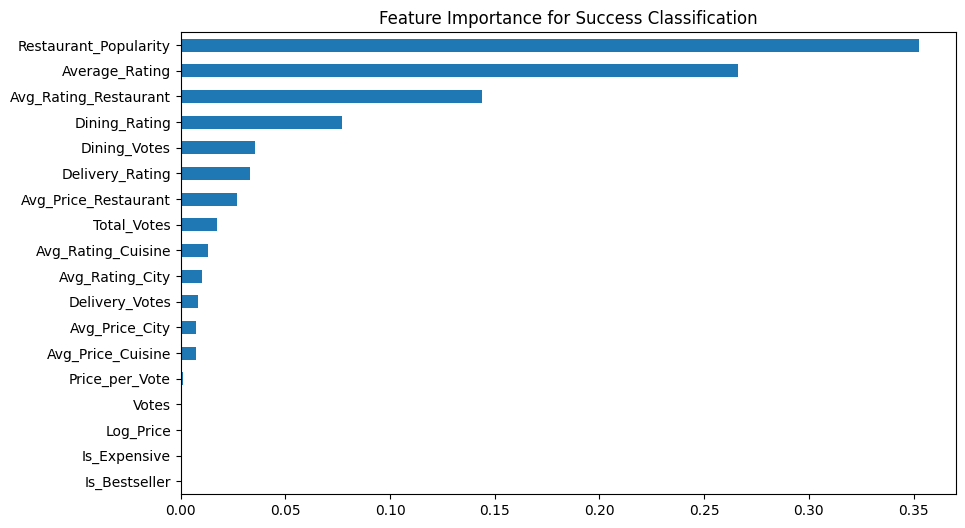

In [7]:
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=features).sort_values(ascending=True)
feat_imp.plot(kind='barh', figsize=(10, 6), title="Feature Importance for Success Classification")


In [8]:
import joblib
joblib.dump(rf, 'D:\ZomatoX-ML\Models\success_classifier_rf.pkl')
joblib.dump(scaler, 'D:\ZomatoX-ML\Models\success_scaler.pkl')


<>:2: SyntaxWarning: invalid escape sequence '\Z'
<>:3: SyntaxWarning: invalid escape sequence '\Z'
<>:2: SyntaxWarning: invalid escape sequence '\Z'
<>:3: SyntaxWarning: invalid escape sequence '\Z'
C:\Users\Admin\AppData\Local\Temp\ipykernel_11592\1252021063.py:2: SyntaxWarning: invalid escape sequence '\Z'
  joblib.dump(rf, 'D:\ZomatoX-ML\Models\success_classifier_rf.pkl')
C:\Users\Admin\AppData\Local\Temp\ipykernel_11592\1252021063.py:3: SyntaxWarning: invalid escape sequence '\Z'
  joblib.dump(scaler, 'D:\ZomatoX-ML\Models\success_scaler.pkl')


['D:\\ZomatoX-ML\\Models\\success_scaler.pkl']

In [9]:
evaluate_model(y_test, lr_preds, "Logistic Regression")
evaluate_model(y_test, rf_preds, "Random Forest Classifier")


📊 Logistic Regression Evaluation:
Accuracy: 0.8410965550703542
Confusion Matrix:
 [[18304  1338]
 [ 2592  2498]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90     19642
           1       0.65      0.49      0.56      5090

    accuracy                           0.84     24732
   macro avg       0.76      0.71      0.73     24732
weighted avg       0.83      0.84      0.83     24732

----------------------------------------
📊 Random Forest Classifier Evaluation:
Accuracy: 1.0
Confusion Matrix:
 [[19642     0]
 [    0  5090]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19642
           1       1.00      1.00      1.00      5090

    accuracy                           1.00     24732
   macro avg       1.00      1.00      1.00     24732
weighted avg       1.00      1.00      1.00     24732

----------------------------------------


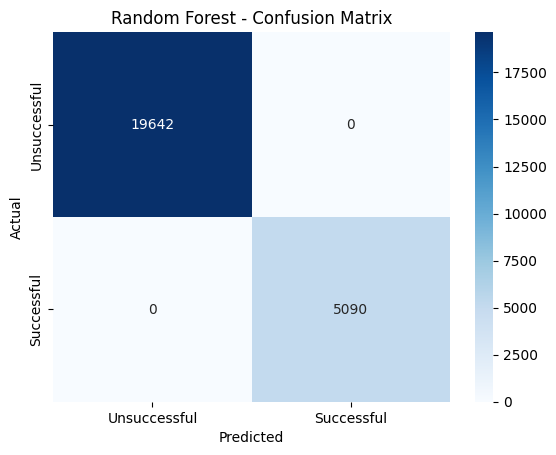

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, rf_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Unsuccessful', 'Successful'], yticklabels=['Unsuccessful', 'Successful'])
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
